In [1]:
import pandas as pd
import numpy as np
import datetime

# Read Data

In [2]:
#df=pd.read_csv('data/calls.csv',index_col='DATE',parse_dates=True)
#df=df.dropna()

In [3]:
df_envios = pd.read_pickle('data/df_Envios')
df_envios.head(1)

,total,Bag 14,Bag 19,Burofax,Devolución burofax,Documentos 14,E-Commerce,E-commerce,E-commerce canje,Ecobox 25,...,Urgente 8:30,Urgente 8:30 expedición,Urgente funchal,Urgente hoy,NaN,Friday,Monday,Thursday,Tuesday,Wednesday
Fecha envío,,,,,,,,,,,,,,,,,,,,,
2019-01-01,33,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0


In [4]:
df_envios.tail(1)

,total,Bag 14,Bag 19,Burofax,Devolución burofax,Documentos 14,E-Commerce,E-commerce,E-commerce canje,Ecobox 25,...,Urgente 8:30,Urgente 8:30 expedición,Urgente funchal,Urgente hoy,NaN,Friday,Monday,Thursday,Tuesday,Wednesday
Fecha envío,,,,,,,,,,,,,,,,,,,,,
2021-12-04,2991,0.0,0.0,6.0,0.0,0.0,0.0,790.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0,0,0,0,0


In [5]:
df_envios = df_envios[['total']]
df_envios.head()

,total
Fecha envío,
2019-01-01,33
2019-01-02,1923
2019-01-03,1408
2019-01-04,3220
2019-01-05,23


In [6]:
df_envios['t1'] = df_envios.shift(periods=1)
df_envios['t2'] = df_envios['total'].shift(periods=2)
df_envios['t3'] = df_envios['total'].shift(periods=3)
df_envios['t4'] = df_envios['total'].shift(periods=4)
df_envios['t5'] = df_envios['total'].shift(periods=5)
df_envios.head()

,total,t1,t2,t3,t4,t5
Fecha envío,,,,,,
2019-01-01,33,NaN,NaN,NaN,NaN,NaN
2019-01-02,1923,33.0,NaN,NaN,NaN,NaN
2019-01-03,1408,1923.0,33.0,NaN,NaN,NaN
2019-01-04,3220,1408.0,1923.0,33.0,NaN,NaN
2019-01-05,23,3220.0,1408.0,1923.0,33.0,NaN


In [7]:
#df_envios.dropna(inplace=True)
df_envios.head()

,total,t1,t2,t3,t4,t5
Fecha envío,,,,,,
2019-01-01,33,NaN,NaN,NaN,NaN,NaN
2019-01-02,1923,33.0,NaN,NaN,NaN,NaN
2019-01-03,1408,1923.0,33.0,NaN,NaN,NaN
2019-01-04,3220,1408.0,1923.0,33.0,NaN,NaN
2019-01-05,23,3220.0,1408.0,1923.0,33.0,NaN


In [8]:
list = ['t5','t4','t3','t2','t1','total']
df_envios = df_envios[list]
df_envios['t'] = df_envios['total']
df_envios.drop('total', axis='columns', inplace=True)
df_envios.index = df_envios.index.rename('Date')
df_envios.head()

,t5,t4,t3,t2,t1,t
Date,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,33
2019-01-02,NaN,NaN,NaN,NaN,33.0,1923
2019-01-03,NaN,NaN,NaN,33.0,1923.0,1408
2019-01-04,NaN,NaN,33.0,1923.0,1408.0,3220
2019-01-05,NaN,33.0,1923.0,1408.0,3220.0,23


In [9]:
df_calls = pd.read_pickle('data/df_Call')
print('Shape of data',df_calls.shape)
df_calls.head()

Shape of data (575, 1)


,dateCreacion
Date,
2019-01-02,281
2019-01-03,283
2019-01-04,351
2019-01-07,173
2019-01-08,174


In [10]:
df_calls.tail()

,dateCreacion
Date,
2021-04-15,116
2021-04-16,114
2021-04-19,114
2021-04-20,108
2021-04-21,53


In [11]:
df_calls.reset_index(inplace=True)
df_calls.head()

,Date,dateCreacion
0,2019-01-02,281
1,2019-01-03,283
2,2019-01-04,351
3,2019-01-07,173
4,2019-01-08,174


In [12]:
df_calls = df_calls.set_index('Date').join(df_envios, how='left')

In [13]:
df_calls.reset_index(inplace=True)
df_calls.head()

,Date,dateCreacion,t5,t4,t3,t2,t1,t
0,2019-01-02,281,NaN,NaN,NaN,NaN,33.0,1923.0
1,2019-01-03,283,NaN,NaN,NaN,33.0,1923.0,1408.0
2,2019-01-04,351,NaN,NaN,33.0,1923.0,1408.0,3220.0
3,2019-01-07,173,1923.0,1408.0,3220.0,23.0,248.0,4595.0
4,2019-01-08,174,1408.0,3220.0,23.0,248.0,4595.0,2924.0


In [14]:
begin_date = '2019-01-02'
end_date = '2021-04-20'

#df = pd.DataFrame({'date':pd.date_range(begin_date, periods=840)})
df = pd.DataFrame({'date':pd.date_range(begin_date,end_date)})

In [15]:
df['Date'] = [str(x.date()) for x in df['date']]

In [16]:
#df = df.set_index('Date').join(df_calls.set_index('Date'))#[['dateCreacion']]
df = df_calls

In [17]:
#df.fillna(0, inplace=True)

In [18]:
df.reset_index(inplace=True)

In [19]:
# Descomentar si hay festivos
#df = df.drop('date', axis='columns')

#df = df.iloc[5:]
df.head(10)

,index,Date,dateCreacion,t5,t4,t3,t2,t1,t
0,0,2019-01-02,281,NaN,NaN,NaN,NaN,33.0,1923.0
1,1,2019-01-03,283,NaN,NaN,NaN,33.0,1923.0,1408.0
2,2,2019-01-04,351,NaN,NaN,33.0,1923.0,1408.0,3220.0
3,3,2019-01-07,173,1923.0,1408.0,3220.0,23.0,248.0,4595.0
4,4,2019-01-08,174,1408.0,3220.0,23.0,248.0,4595.0,2924.0
5,5,2019-01-09,227,3220.0,23.0,248.0,4595.0,2924.0,289.0
6,6,2019-01-10,236,23.0,248.0,4595.0,2924.0,289.0,2461.0
7,7,2019-01-11,270,248.0,4595.0,2924.0,289.0,2461.0,23.0
8,8,2019-01-14,260,289.0,2461.0,23.0,1121.0,209.0,3237.0
9,9,2019-01-15,259,2461.0,23.0,1121.0,209.0,3237.0,2911.0


In [20]:
df.fillna(0, inplace=True)

In [21]:
list = ['Date','t5','t4','t3','t2','t1','t','dateCreacion']
df = df[list]
df.head(10)

,Date,t5,t4,t3,t2,t1,t,dateCreacion
0,2019-01-02,0.0,0.0,0.0,0.0,33.0,1923.0,281
1,2019-01-03,0.0,0.0,0.0,33.0,1923.0,1408.0,283
2,2019-01-04,0.0,0.0,33.0,1923.0,1408.0,3220.0,351
3,2019-01-07,1923.0,1408.0,3220.0,23.0,248.0,4595.0,173
4,2019-01-08,1408.0,3220.0,23.0,248.0,4595.0,2924.0,174
5,2019-01-09,3220.0,23.0,248.0,4595.0,2924.0,289.0,227
6,2019-01-10,23.0,248.0,4595.0,2924.0,289.0,2461.0,236
7,2019-01-11,248.0,4595.0,2924.0,289.0,2461.0,23.0,270
8,2019-01-14,289.0,2461.0,23.0,1121.0,209.0,3237.0,260
9,2019-01-15,2461.0,23.0,1121.0,209.0,3237.0,2911.0,259


# Plot Your Data

<AxesSubplot:>

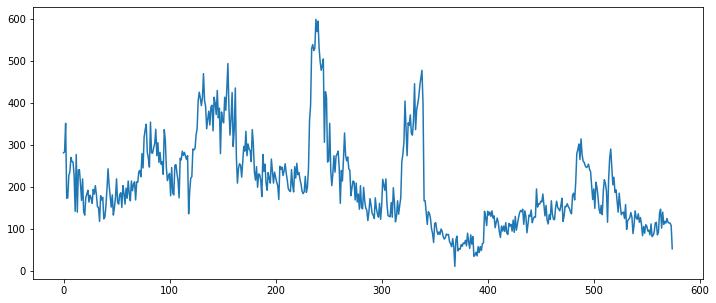

In [22]:
df['dateCreacion'].plot(figsize=(12,5))

# Test Log in data

In [23]:
'''df_log = df
df_log['dateCreacion'] = np.log1p(df_log['dateCreacion'])
df_log['dateCreacion'].plot(figsize=(12,5))

df = df_log'''

"df_log = df\ndf_log['dateCreacion'] = np.log1p(df_log['dateCreacion'])\ndf_log['dateCreacion'].plot(figsize=(12,5))\n\ndf = df_log"

# Check For Stationarity

In [24]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [25]:
adf_test(df['dateCreacion'])

1. ADF :  -3.1969282911583643
2. P-Value :  0.02016317169837937
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 572
5. Critical Values :
	 1% :  -3.441834071558759
	 5% :  -2.8666061267054626
	 10% :  -2.569468095872659


# Figure Out Order for ARIMA Model

In [26]:
import statsmodels.graphics.tsaplots as sgt
import matplotlib.pyplot as plt

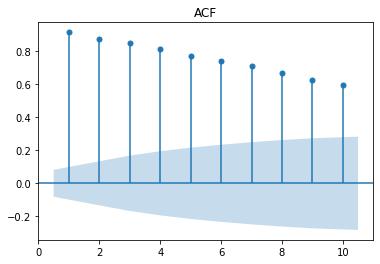

In [27]:
sgt.plot_acf(df['dateCreacion'], lags=10, zero=False)
plt.title("ACF")
plt.show()

In [28]:
df['lag1'] = df['dateCreacion'].shift(1)#1
df['lag6'] = df['dateCreacion'].shift(2)#6
df['lag7'] = df['dateCreacion'].shift(3)#7
df['lag8'] = df['dateCreacion'].shift(4)#8

In [29]:
df['lag9'] = df['dateCreacion'].shift(5)
df['lag10'] = df['dateCreacion'].shift(6)
df['lag11'] = df['dateCreacion'].shift(7)
df['lag12'] = df['dateCreacion'].shift(8)

In [30]:
df['sinlag1'] = np.sin(2*np.pi*(1/1)*df.index)#1
df['coslag1'] = np.cos(2*np.pi*(1/1)*df.index)#1

df['sinlag6'] = np.sin(2*np.pi*(1/2)*df.index)#6
df['coslag6'] = np.cos(2*np.pi*(1/2)*df.index)#6

df['sinlag7'] = np.sin(2*np.pi*(1/3)*df.index)#7
df['coslag7'] = np.cos(2*np.pi*(1/3)*df.index)#7

df['sinlag8'] = np.sin(2*np.pi*(1/4)*df.index)#8
df['coslag8'] = np.cos(2*np.pi*(1/4)*df.index)#8

In [31]:
df['sinlag9'] = np.sin(2*np.pi*(1/5)*df.index)#1
df['coslag9'] = np.cos(2*np.pi*(1/5)*df.index)#1

df['sinlag10'] = np.sin(2*np.pi*(1/6)*df.index)#6
df['coslag10'] = np.cos(2*np.pi*(1/6)*df.index)#6

df['sinlag11'] = np.sin(2*np.pi*(1/7)*df.index)#7
df['coslag11'] = np.cos(2*np.pi*(1/7)*df.index)#7

df['sinlag12'] = np.sin(2*np.pi*(1/8)*df.index)#8
df['coslag12'] = np.cos(2*np.pi*(1/8)*df.index)#8

In [32]:
df.head()

,Date,t5,t4,t3,t2,t1,t,dateCreacion,lag1,lag6,...,sinlag8,coslag8,sinlag9,coslag9,sinlag10,coslag10,sinlag11,coslag11,sinlag12,coslag12
0,2019-01-02,0.0,0.0,0.0,0.0,33.0,1923.0,281,NaN,NaN,...,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000e+00,1.0,0.000000,1.000000,0.000000e+00,1.000000e+00
1,2019-01-03,0.0,0.0,0.0,33.0,1923.0,1408.0,283,281.0,NaN,...,1.000000e+00,6.123234e-17,0.951057,0.309017,8.660254e-01,0.5,0.781831,0.623490,7.071068e-01,7.071068e-01
2,2019-01-04,0.0,0.0,33.0,1923.0,1408.0,3220.0,351,283.0,281.0,...,1.224647e-16,-1.000000e+00,0.587785,-0.809017,8.660254e-01,-0.5,0.974928,-0.222521,1.000000e+00,6.123234e-17
3,2019-01-07,1923.0,1408.0,3220.0,23.0,248.0,4595.0,173,351.0,283.0,...,-1.000000e+00,-1.836970e-16,-0.587785,-0.809017,1.224647e-16,-1.0,0.433884,-0.900969,7.071068e-01,-7.071068e-01
4,2019-01-08,1408.0,3220.0,23.0,248.0,4595.0,2924.0,174,173.0,351.0,...,-2.449294e-16,1.000000e+00,-0.951057,0.309017,-8.660254e-01,-0.5,-0.433884,-0.900969,1.224647e-16,-1.000000e+00


In [33]:
df = df.iloc[8:]
df = df.loc[:, df.columns != 'Date']

In [34]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [35]:
stepwise_fit = auto_arima(df['dateCreacion'], trace=True,
                          suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5767.505, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5818.271, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5776.652, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5766.990, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5816.316, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5768.865, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5768.787, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5769.510, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5765.073, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5766.950, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=5766.871, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5774.721, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=5767.595, Time=0.17 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.522 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  567
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2880.537
Date:                Tue, 08 Jun 2021   AIC                           5765.073
Time:                        18:05:00   BIC                           5773.750
Sample:                             0   HQIC                          5768.460
                                - 567                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3202      0.028    -11.439      0.000      -0.375      -0.265
sigma2      1541.6087     50.499     30.528      0.000    1442.633    1640.584
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               599.45
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                            -0.60
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Split Data into Training and Testing

In [37]:
print(df.shape)

(567, 31)


In [38]:
i, m = df.shape

to_train = int(i*0.8)
to_test = i - to_train

print(to_train, to_test)
print(to_train+to_test)

453 114
567


In [39]:
X_train, y_train = df.iloc[:to_train, df.columns != 'dateCreacion'], df['dateCreacion'][:to_train]
X_test, y_test = df.iloc[-to_test:, df.columns != 'dateCreacion'], df['dateCreacion'][-to_test:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(453, 30) (453,)
(114, 30) (114,)


In [40]:
'''train = df.iloc[:to_train]
test = df.iloc[-to_test:]
print(train.shape,test.shape)
print(test.iloc[0]), print(test.iloc[-1])'''

'train = df.iloc[:to_train]\ntest = df.iloc[-to_test:]\nprint(train.shape,test.shape)\nprint(test.iloc[0]), print(test.iloc[-1])'

## Try to normalize

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

y_train = np.log1p(y_train)
##y_test = np.log1p(y_test)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train the Model

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [44]:
model=SARIMAX(y_train, order=(0,1,1), exog=X_train)
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           dateCreacion   No. Observations:                  453
Model:               SARIMAX(0, 1, 1)   Log Likelihood                  85.480
Date:                Tue, 08 Jun 2021   AIC                           -106.961
Time:                        18:05:02   BIC                             24.677
Sample:                             0   HQIC                           -55.087
                                - 453                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0054      0.014     -0.379      0.705      -0.033       0.022
x2             0.0091      0.012      0.768      0.442      -0.014       0.032
x3             0.0141      0.014      1.031      0.303      -0.013       0.041
x4             0.0220      0.012      1.822      0.068      -0.002       0.046
x5             0.0103      0.013      0.810      0.418      -0.015       0.035
x6            -0.0058      0.012     -0.487      0.626      -0.029       0.018
x7             0.1461      0.033      4.418      0.000       0.081       0.211
x8             0.0373      0.035      1.065      0.287      -0.031       0.106
x9             0.0775      0.035      2.219      0.026       0.009       0.146
x10           -0.0093      0.037     -0.249      0.804      -0.083       0.064
x11           -0.0393      0.035     -1.111      0.267      -0.109       0.030
x12           -0.0056      0.035     -0.160      0.873      -0.074       0.063
x13            0.0343      0.034      1.004      0.315      -0.033       0.101
x14           -0.0139      0.028     -0.490      0.624      -0.069       0.042
x15            0.0016      0.011      0.144      0.886      -0.020       0.024
const      -2.575e-17        nan        nan        nan         nan         nan
x16            0.0146      0.014      1.077      0.282      -0.012       0.041
x17            0.0218      0.012      1.754      0.079      -0.003       0.046
x18           -0.0007      0.009     -0.081      0.936      -0.019       0.017
x19           -0.0054      0.009     -0.564      0.573      -0.024       0.013
x20           -0.0109      0.010     -1.140      0.254      -0.030       0.008
x21           -0.0094      0.010     -0.923      0.356      -0.029       0.011
x22            0.0113      0.011      1.077      0.281      -0.009       0.032
x23            0.0044      0.011      0.387      0.699      -0.018       0.027
x24            0.0030      0.010      0.302      0.762      -0.016       0.023
x25            0.0077      0.010      0.751      0.452      -0.012       0.028
x26            0.0118      0.010      1.148      0.251      -0.008       0.032
x27            0.0158      0.011      1.476      0.140      -0.005       0.037
x28            0.0068      0.011      0.644      0.519      -0.014       0.028
x29            0.0167      0.011      1.567      0.117      -0.004       0.038
ma.L1         -0.6901      0.039    -17.785      0.000      -0.766      -0.614
sigma2         0.0401      0.002     21.278      0.000       0.036       0.044
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):              2652.05
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               2.28   Skew:                            -1.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.61
========================================================

# Make Predictions on Test Set

<AxesSubplot:>

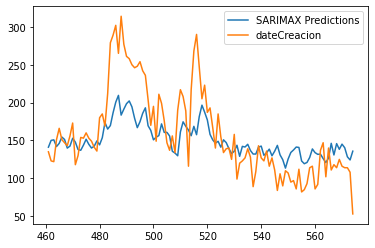

In [45]:
start = len(X_train)
end = len(X_train)+len(X_test)-1

pred = model.predict(start=start, end=end, exog=X_test, typ='levels').rename('SARIMAX Predictions')
pred = pred.apply(lambda x: 0 if x < 0 else x )

pred = np.expm1(pred)

pred.plot(legend=True)
y_test.plot(legend=True)

In [46]:
error = pd.DataFrame(y_test, columns=['dateCreacion'])
error['predicciones'] = pred
error.head()

,dateCreacion,predicciones
461,135,141.122813
462,123,150.079140
463,122,150.803530
464,151,141.934001
465,166,146.153434


In [47]:
error['diff'] = error.dateCreacion - error.predicciones
error.head()

,dateCreacion,predicciones,diff
461,135,141.122813,-6.122813
462,123,150.079140,-27.079140
463,122,150.803530,-28.803530
464,151,141.934001,9.065999
465,166,146.153434,19.846566


In [48]:
error['diff'].describe()

count    114.000000
mean       8.453189
std       41.311590
min      -82.847260
25%      -18.856146
50%       -0.372876
75%       32.895529
max      132.398335
Name: diff, dtype: float64

<AxesSubplot:>

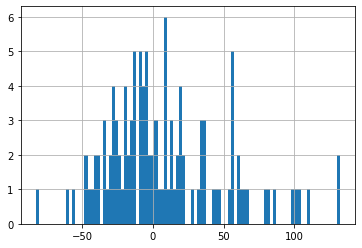

In [49]:
error['diff'].hist(bins=100)

<AxesSubplot:>

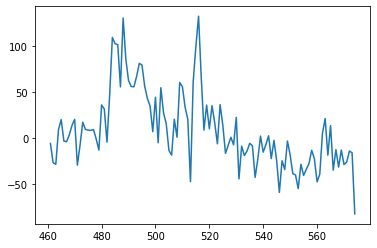

In [50]:
error['diff'].plot()

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
rmse = mean_squared_error(y_test, pred, squared=False)
print(rmse)

41.98968027629892


In [53]:
model2=SARIMAX(df['dateCreacion'],order=(0,1,1))
model2=model2.fit()

# For Future Dates

In [54]:
pred = model2.predict(start=len(df)-10, end=len(df)+3, typ='levels').rename('SARIMAX Predictions')
#print(comp_pred)
#pred.index=index_future_dates
print(pred)

565    113.934950
566    131.653163
567    117.613783
568    117.876321
569    115.241318
570    121.874968
571    117.881347
572    115.242928
573    114.398024
574    110.048846
575     71.268809
576     71.268809
577     71.268809
578     71.268809
Name: SARIMAX Predictions, dtype: float64


<AxesSubplot:>

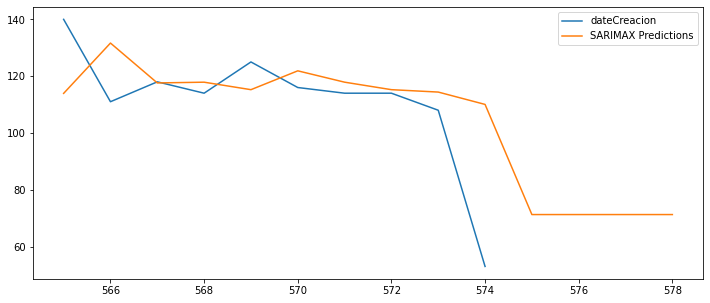

In [55]:
df['dateCreacion'][-10:].plot(legend=True)
pred.plot(figsize=(12,5),legend=True)